<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Library-and-Data-Import" data-toc-modified-id="Library-and-Data-Import-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Library and Data Import</a></span></li><li><span><a href="#Webscraping-for-SIC-codes" data-toc-modified-id="Webscraping-for-SIC-codes-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Webscraping for SIC codes</a></span></li><li><span><a href="#Initial-Data-Exploration" data-toc-modified-id="Initial-Data-Exploration-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Initial Data Exploration</a></span><ul class="toc-item"><li><span><a href="#Pandas-Profiling" data-toc-modified-id="Pandas-Profiling-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Pandas Profiling</a></span></li></ul></li><li><span><a href="#Pre-processing" data-toc-modified-id="Pre-processing-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Pre-processing</a></span><ul class="toc-item"><li><span><a href="#Filling-region-data" data-toc-modified-id="Filling-region-data-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Filling region data</a></span></li><li><span><a href="#Calculating-Average-Salary" data-toc-modified-id="Calculating-Average-Salary-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Calculating Average Salary</a></span></li><li><span><a href="#Merging-Job-Advert-and-SOC-Datasets" data-toc-modified-id="Merging-Job-Advert-and-SOC-Datasets-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Merging Job Advert and SOC Datasets</a></span></li></ul></li><li><span><a href="#Data-Analysis" data-toc-modified-id="Data-Analysis-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Data Analysis</a></span><ul class="toc-item"><li><span><a href="#Average-salary-vs.-job-type" data-toc-modified-id="Average-salary-vs.-job-type-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Average salary vs. job type</a></span></li><li><span><a href="#Average-salary-vs.-Nation" data-toc-modified-id="Average-salary-vs.-Nation-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Average salary vs. Nation</a></span></li><li><span><a href="#Salary-vs.-city" data-toc-modified-id="Salary-vs.-city-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Salary vs. city</a></span></li><li><span><a href="#How-many-work-from-home-jobs-were-advertised?" data-toc-modified-id="How-many-work-from-home-jobs-were-advertised?-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>How many work-from-home jobs were advertised?</a></span></li></ul></li><li><span><a href="#Regressions" data-toc-modified-id="Regressions-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Regressions</a></span><ul class="toc-item"><li><span><a href="#Does-salary-correlate-with-any-features?" data-toc-modified-id="Does-salary-correlate-with-any-features?-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Does salary correlate with any features?</a></span></li></ul></li></ul></div>

# Library and Data Import

In [147]:
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
from bs4 import BeautifulSoup
import pandas_profiling
from sklearn.linear_model import LinearRegression
import matplotlib.ticker as ticker # needed for formatting matplotlib plots
from heatmap import heatmap, corrplot # A better library to plot heatmaps for correlations

sns.set(
    style='darkgrid',
    rc={
        'figure.figsize': (12, 8),
        'figure.dpi': 100,
    }
)

In [104]:
# Reading job advert data and using the unique Job ID as the index
data = pd.read_csv('Data/2021.csv')

# # Reading the UK Standard Occupational Classification (SOC)
# soc_codes = pd.read_csv('Data/Copy of soc_code_mapping.csv')

# # Reading the UK Standard Industrial Classification of Economic Activities (SIC)
# sic_codes = pd.read_csv('Data/Copy of sic2007summaryofstructurtcm6.csv')

# Webscraping for SIC codes

Printing Industrial Classification codes shows columns and data are not aligned:

In [105]:
sic_codes.head(10)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
0,SECTION,NaN,Division,NaN,Group,NaN,Class,NaN,Sub Class,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,A,"AGRICULTURE, FORESTRY AND FISHING",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,01,"Crop and animal production, hunting and relate...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,01.1,Growing of non-perennial crops,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,01.11,"Growing of cereals (except rice), leguminous c...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,01.12,Growing of rice,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,01.13,"Growing of vegetables and melons, roots and tu...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,01.14,Growing of sugar cane,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


So we find the SIC codes from https://www.hesa.ac.uk/support/documentation/industrial/sic2007 and download the html file and then read it:

In [106]:
with open('Data/Standard Industrial Classification_ SIC2007 _ HESA.html', 'rb') as file:
    page = BeautifulSoup(file)

In [107]:
# We find the data we need is in unordered lists with class as list-unbulleted so we search for those
uls = page.find_all('ul',attrs={'class':'list-unbulleted'})

In [108]:
lists = []
# Iterating through the unordered lists, splitting them into the code and the description and then concatenating
for ul in uls:
    split_ul = ul.text.splitlines()
    expaned_ul = pd.DataFrame(split_ul)[0].str.split(' ',expand=True,n=1)
    lists.append(expaned_ul)
SIC = pd.concat(lists).reset_index(drop=True)
SIC.drop(index=0,inplace=True)

# Cleaning the codes from the brackets
SIC[0] = SIC[0].str.replace(r'({|})', '')

# Renaming columns
SIC.columns=['Code','Description']

Checking the results of this operation we see a clean mapping of code to description:

In [109]:
SIC.head()

,Code,Description
1,A,"Agriculture, forestry and fishing"
2,B,Mining and quarrying
3,C,Manufacturing
4,D,"Electricity, gas, steam and air conditioning s..."
5,E,"Water supply, sewerage, waste management and r..."


# Initial Data Exploration

In [110]:
# Quick look at data
data.head()

,JobID,CanonCity,Region,Nation,CleanJobTitle,JobDate,JobText,PostingHTML,Latitude,Longitude,CanonSkillClusters,SOCCode,StandardMajor,MaxExperience,MinExperience,SICCode,MaxAnnualSalary,MinAnnualSalary,WorkFromHome
0,803304103,NaN,South West,England,Inbound Customer Service Advisor,2021-01-01,Inbound Customer Service Advisor\r\n\r\nPosted...,"<!DOCTYPE HTML>\r\n<html class=""no-js svg "">\...",NaN,NaN,Customer and Client Support: Basic Customer Se...,7219.0,NaN,NaN,NaN,NaN,24000.0,20000.0,False
1,803304099,Kidderminster,West Midlands,England,"Java Developer, Jee, Reactjs",2021-01-01,"Java Developer, JEE, ReactJS\r\n\r\nEmployer\r...","<!DOCTYPE html>\r\n<html lang=""en-GB"">\r\n <h...",52.3871,-2.2505,Information Technology: Java;Specialised Skills,2136.0,NaN,NaN,NaN,NaN,35000.0,35000.0,False
2,803304098,London,Greater London,England,Partners,2021-01-01,Partners,"<script type=""text/javascript""> if(navigator.u...",51.5453,-0.1333,NaN,2413.0,NaN,NaN,NaN,73.11,NaN,NaN,False
3,803304095,NaN,South East,England,Small Animal Vet/Exotics,2021-01-01,Home > Jobs > Veterinary Surgeons\r\n\r\nSmall...,"<!DOCTYPE html>\r\n<html lang=""en"">\r\n<head>\...",NaN,NaN,Health Care: Gastroenterology;Specialised Skil...,2216.0,NaN,NaN,NaN,75.00,NaN,NaN,False
4,803304091,Armagh,NaN,Northern Ireland,Electrical Maintenance/Project Engineer,2021-01-01,Electrical Maintenance / Project Engineer \r\n...,<!DOCTYPE html>\r\n<!--[if lt IE 7]> <htm...,54.2922,-6.6517,"Maintenance, Repair, and Installation: Equipme...",2123.0,NaN,NaN,3.0,C,35000.0,30000.0,False


In [111]:
# Quick analysis of null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300450 entries, 0 to 1300449
Data columns (total 19 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   JobID               1300450 non-null  int64  
 1   CanonCity           953757 non-null   object 
 2   Region              1018694 non-null  object 
 3   Nation              1150969 non-null  object 
 4   CleanJobTitle       1300347 non-null  object 
 5   JobDate             1300450 non-null  object 
 6   JobText             1300449 non-null  object 
 7   PostingHTML         1300450 non-null  object 
 8   Latitude            907194 non-null   float64
 9   Longitude           907194 non-null   float64
 10  CanonSkillClusters  1173279 non-null  object 
 11  SOCCode             1299178 non-null  float64
 12  StandardMajor       167379 non-null   object 
 13  MaxExperience       23451 non-null    float64
 14  MinExperience       180767 non-null   float64
 15  SICCode        

In [112]:
data.describe()

,JobID,Latitude,Longitude,SOCCode,MaxExperience,MinExperience,MaxAnnualSalary,MinAnnualSalary
count,1.300450e+06,907194.000000,907194.000000,1.299178e+06,23451.000000,180767.000000,796056.000000,796056.000000
mean,8.053409e+08,52.488267,-1.382243,3.735067e+03,4.963335,3.205846,40114.567988,34773.302094
std,1.140384e+06,1.394595,1.471164,2.182500e+03,3.283735,2.564422,22182.291828,19052.234575
min,8.033030e+08,50.078900,-7.829300,1.115000e+03,0.166700,0.083300,10000.000000,3900.000000
25%,8.043702e+08,51.568200,-2.235500,2.139000e+03,3.000000,1.500000,24157.000000,21174.400000
50%,8.053526e+08,51.896100,-1.332100,3.119000e+03,5.000000,3.000000,35000.000000,30000.000000
75%,8.063054e+08,53.397200,-0.013600,5.231000e+03,5.000000,5.000000,49400.000000,40000.000000
max,8.073332e+08,60.153400,2.473000,9.279000e+03,30.000000,15.000000,150000.000000,150000.000000


## Pandas Profiling

In [113]:
# data.Profile_Report()

# Pre-processing

## Filling region data

**Looking at the 'Region' column, we notice that when the nation is not England, the region is null**

In [114]:
data[data['Nation'].isin(['Scotland','Wales','Northern Ireland'])].sample(5)

,JobID,CanonCity,Region,Nation,CleanJobTitle,JobDate,JobText,PostingHTML,Latitude,Longitude,CanonSkillClusters,SOCCode,StandardMajor,MaxExperience,MinExperience,SICCode,MaxAnnualSalary,MinAnnualSalary,WorkFromHome
745344,805619670,Newport,NaN,Wales,Accounts Assistant,2021-02-08,Job summary\r\n\r\n \r\n \r\nSector:...,"<!DOCTYPE html>\r\n<html lang=""en"" dir=""ltr"" p...",51.5724,-3.0104,Specialised Skills|Finance: Billing and Invoic...,4122.0,NaN,NaN,NaN,NaN,21000.0,19000.0,True
361750,804459487,Swansea,NaN,Wales,Cleaner,2021-01-20,Cleaner Swansea\r\n\r\nSelco Builders Warehou...,"<!DOCTYPE html>\r\n<html dir=""ltr"" lang=""en"">\...",51.6479,-3.9241,Specialised Skills,9233.0,NaN,NaN,NaN,46.13,NaN,NaN,False
395701,804561397,Aberdeen,NaN,Scotland,Senior Improvement Advisor,2021-01-22,Your application for\r\n\r\nSenior Improvement...,"<!DOCTYPE html>\r\n<html lang=""en"">\r\n\t<head...",57.1497,-2.0943,Personal Care and Services: Child Care;Special...,1139.0,NaN,NaN,NaN,NaN,52971.0,47973.0,False
1184721,806981067,Livingston,NaN,Scotland,Food Engineer/Shift Engineer - Mechanical,2021-02-27,1199\r\n\r\nhttps://burtonsbiscuits.livevacanc...,<html><head><title></title></head><body>1199 <...,55.8928,-3.4815,NaN,2122.0,NaN,NaN,NaN,10.72,NaN,NaN,False
55049,803511858,Belfast,NaN,Northern Ireland,Staff Officer Accountant,2021-01-04,Staff Officer Accountant\r\n\r\nPosted 2 days ...,"<!DOCTYPE HTML>\r\n<html class=""no-js svg "">\...",54.5992,-5.9294,Finance: General Accounting;Specialised Skills...,2421.0,"Accounting and Finance|Finance, General",NaN,2.0,NaN,NaN,NaN,False


In [115]:
# We fill the null values in 'Region' with values from the 'Nation' column and print a sample to check
data['Region'].fillna(data['Nation'], inplace=True)

## Calculating Average Salary

In [116]:
# Calculating average salary from maximum and minimum annual salary.
# Some nuance for the jobs might be lost from this operation.
data['Average_Salary'] = data[['MaxAnnualSalary','MinAnnualSalary']].mean(axis=1)

# Dropping min and max annual salary columns
data.drop(['MaxAnnualSalary','MinAnnualSalary'], axis=1, inplace=True)

## Merging Job Advert and SOC Datasets

In [118]:
# Merging SOC codes and meanings onto job advert database
jobs = pd.merge(data, soc_codes, left_on="SOCCode", right_on="soc", how='left')
# Merging SIC codes and meanings onto job advert database
jobs = pd.merge(jobs, SIC, left_on="SICCode", right_on="Code", how='left')

In [119]:
jobs.head()

,JobID,CanonCity,Region,Nation,CleanJobTitle,JobDate,JobText,PostingHTML,Latitude,Longitude,...,StandardMajor,MaxExperience,MinExperience,SICCode,WorkFromHome,Average_Salary,soc,soc_name,Code,Description
0,803304103,NaN,South West,England,Inbound Customer Service Advisor,2021-01-01,Inbound Customer Service Advisor\r\n\r\nPosted...,"<!DOCTYPE HTML>\r\n<html class=""no-js svg "">\...",NaN,NaN,...,NaN,NaN,NaN,NaN,False,22000.0,7219.0,Customer service occupations n.e.c.,NaN,NaN
1,803304099,Kidderminster,West Midlands,England,"Java Developer, Jee, Reactjs",2021-01-01,"Java Developer, JEE, ReactJS\r\n\r\nEmployer\r...","<!DOCTYPE html>\r\n<html lang=""en-GB"">\r\n <h...",52.3871,-2.2505,...,NaN,NaN,NaN,NaN,False,35000.0,2136.0,Programmers and software development professio...,NaN,NaN
2,803304098,London,Greater London,England,Partners,2021-01-01,Partners,"<script type=""text/javascript""> if(navigator.u...",51.5453,-0.1333,...,NaN,NaN,NaN,73.11,False,NaN,2413.0,Solicitors,NaN,NaN
3,803304095,NaN,South East,England,Small Animal Vet/Exotics,2021-01-01,Home > Jobs > Veterinary Surgeons\r\n\r\nSmall...,"<!DOCTYPE html>\r\n<html lang=""en"">\r\n<head>\...",NaN,NaN,...,NaN,NaN,NaN,75.00,False,NaN,2216.0,Veterinarians,NaN,NaN
4,803304091,Armagh,Northern Ireland,Northern Ireland,Electrical Maintenance/Project Engineer,2021-01-01,Electrical Maintenance / Project Engineer \r\n...,<!DOCTYPE html>\r\n<!--[if lt IE 7]> <htm...,54.2922,-6.6517,...,NaN,NaN,3.0,C,False,32500.0,2123.0,Electrical engineers,C,Manufacturing


# Data Analysis

## Average salary vs. job type

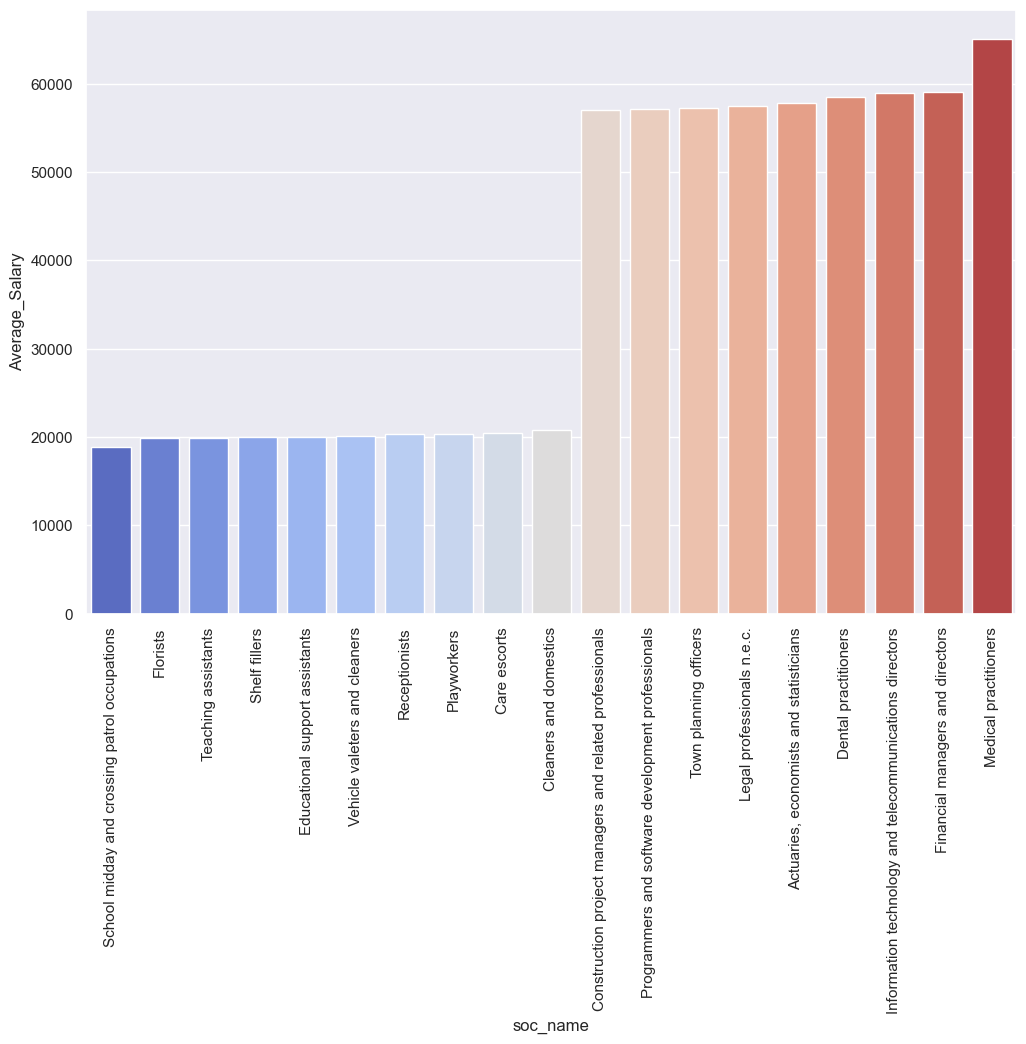

In [206]:
# Getting average salary by SOC code
sal_by_soc = jobs.groupby('soc_name').mean()[['Average_Salary']]

# Sorting values, dropping NAs, selecting bottom and top 10 cities and resetting index
top_bot_10 = sal_by_soc.sort_values('Average_Salary').dropna().iloc[np.r_[:10, -9:sal_by_soc.shape[1]-1],:].reset_index()

ax = sns.barplot(x='soc_name', y="Average_Salary", data=top_bot_10, palette="coolwarm")

# ax.set_title('Top 10 and Bottom 10 Cities for maximum annual salary')
# ax.set_ylabel('Average Maximum Annual Salary')

# Change rotation of tick labels to vertical to improve visibility
ax.set_xticklabels(ax.get_xticklabels(), 
                          rotation=90)

plt.show()

## Average salary vs. Nation

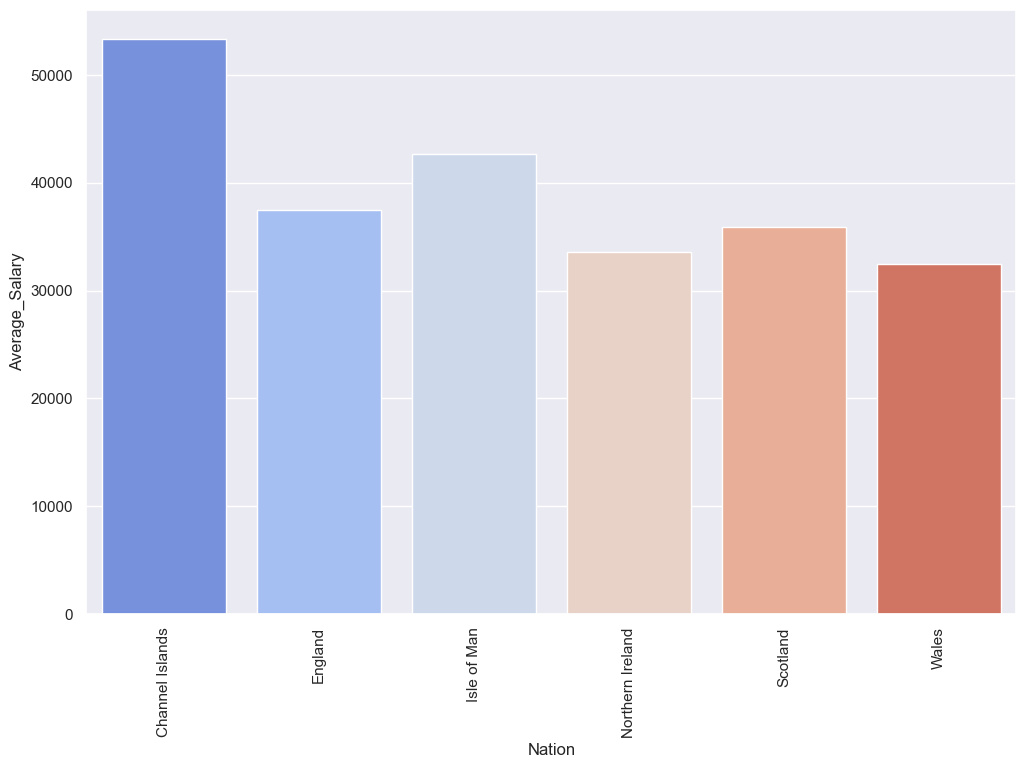

In [204]:
# Getting average salary by SOC code
sal_by_nation = jobs.groupby('Nation').mean()[['Average_Salary']].reset_index()

# Sorting values, dropping NAs, selecting bottom and top 10 cities and resetting index
# top_bot_10 = sal_by_soc.sort_values('Average_Salary').dropna().iloc[np.r_[:10, -9:sal_by_soc.shape[1]-1],:].reset_index()

ax = sns.barplot(x='Nation', y="Average_Salary", data=sal_by_nation, palette="coolwarm")

# ax.set_title('Top 10 and Bottom 10 Cities for maximum annual salary')
# ax.set_ylabel('Average Maximum Annual Salary')

# Change rotation of tick labels to vertical to improve visibility
ax.set_xticklabels(ax.get_xticklabels(), 
                          rotation=90)

plt.show()

**Channel Islands looking pretty good but poor Welsh!**

## Salary vs. city

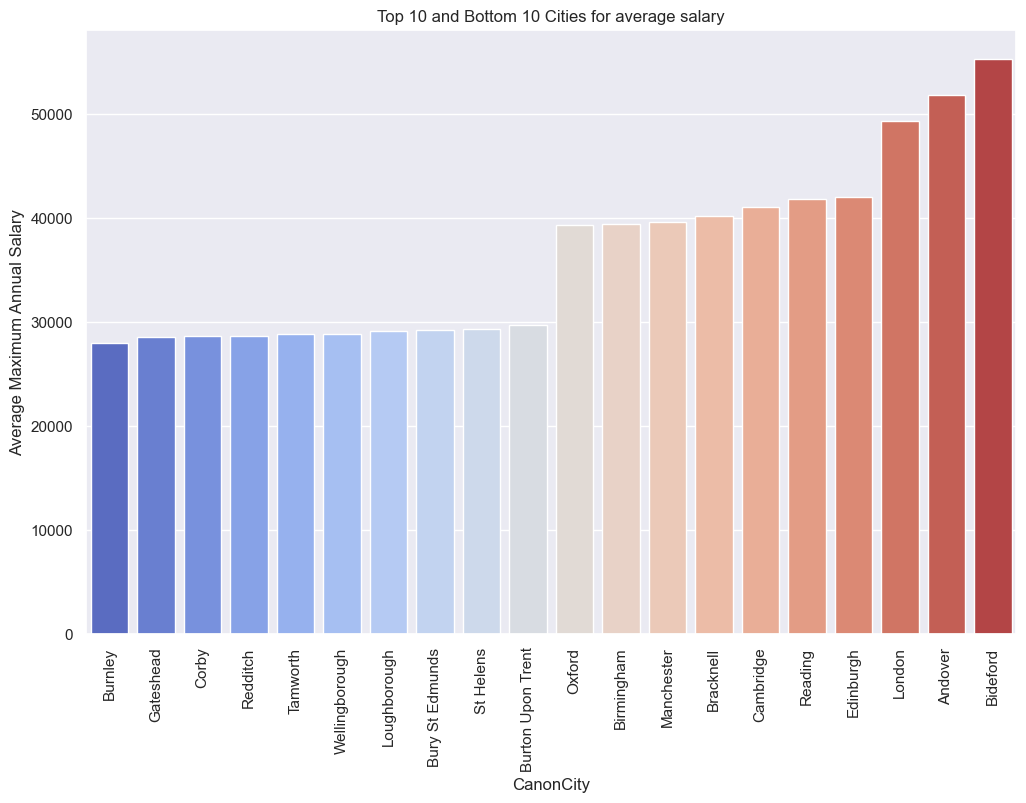

In [274]:
# Getting average salary by city and count of salaries
sal_by_city = data.groupby('CanonCity').agg(['mean','count'])

# Filtering out cities with less than 100 jobs
sal_by_city = sal_by_city[sal_by_city[('JobID','count')] >1000]

# Sorting values, dropping NAs, selecting bottom and top 10 cities and resetting index
top_bot_10 = sal_by_city.sort_values([('Average_Salary','mean')]).dropna().iloc[list(range(10))+list(range(-10,0))].reset_index()

ax = sns.barplot(x='CanonCity', y=('Average_Salary','mean'), data=top_bot_10, palette="coolwarm")

ax.set_title('Top 10 and Bottom 10 Cities for average salary')
ax.set_ylabel('Average Maximum Annual Salary')

# Change rotation of tick labels to vertical to improve visibility
ax.set_xticklabels(ax.get_xticklabels(), 
                          rotation=90)

# Making city names on x axis not all uppercase
labels = [item.get_text().title() for item in ax.get_xticklabels()]
ax.set_xticklabels(labels)

plt.show()

## How many work-from-home jobs were advertised?
What's the proportion of work from home job adverts?

We group by the 'WorkFromHome' column and aggregate with count and then plot the unique JobID count:

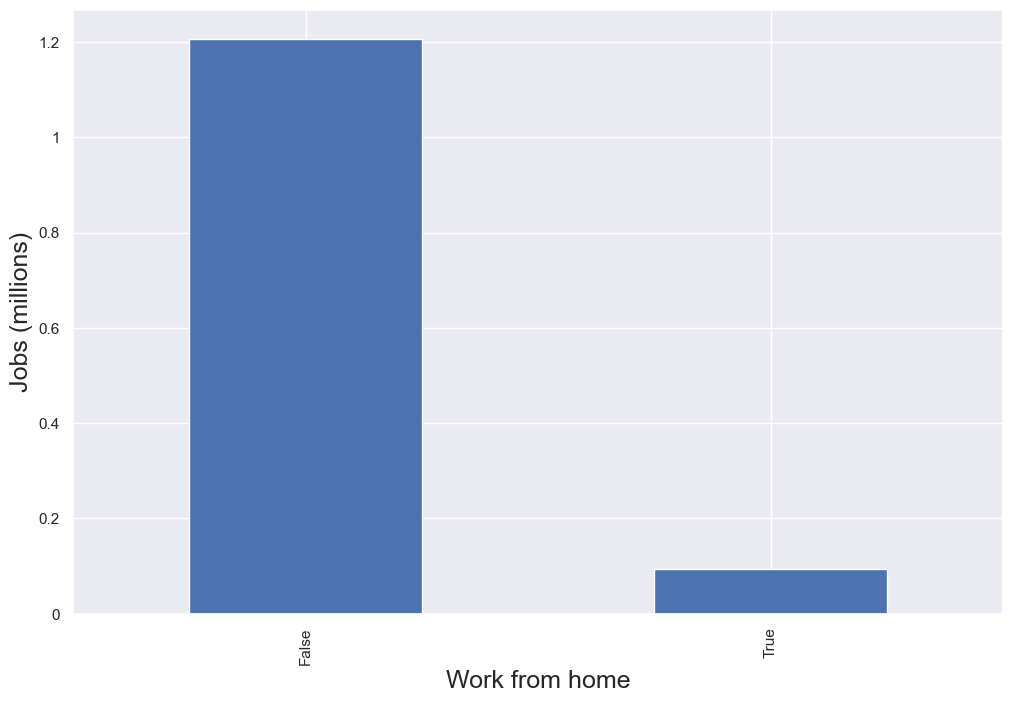

In [156]:
ax = data.groupby('WorkFromHome').count()['JobID'].plot.bar(x='JobID')

# Labelling the x-axis
ax.set_xlabel('Work from home', fontsize=18)
ax.set_ylabel('Jobs (millions)', fontsize=18)

# Scaling y-axis to millions of Jobs
scale = 1e-6
ticks = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x*scale))
ax.yaxis.set_major_formatter(ticks)

# Regressions

## Does salary correlate with any features?
**First we calculate the Pearson correlation values. This only gives us the correlations between the numerical columns:**

In [157]:
data.corr()

,JobID,Latitude,Longitude,SOCCode,MaxExperience,MinExperience,WorkFromHome,Average_Salary
JobID,1.000000,0.005190,0.003198,-0.007008,0.019794,0.024227,-0.000168,0.005543
Latitude,0.005190,1.000000,-0.534717,0.047216,-0.052175,-0.067910,-0.001274,-0.115872
Longitude,0.003198,-0.534717,1.000000,-0.054379,0.069083,0.088170,0.002107,0.146507
SOCCode,-0.007008,0.047216,-0.054379,1.000000,-0.143317,-0.201981,-0.051820,-0.385936
MaxExperience,0.019794,-0.052175,0.069083,-0.143317,1.000000,0.868279,-0.024785,0.289513
MinExperience,0.024227,-0.067910,0.088170,-0.201981,0.868279,1.000000,0.002360,0.288598
WorkFromHome,-0.000168,-0.001274,0.002107,-0.051820,-0.024785,0.002360,1.000000,0.067209
Average_Salary,0.005543,-0.115872,0.146507,-0.385936,0.289513,0.288598,0.067209,1.000000


**Then we plit the correlation coefficients in a heatmap where both the color and the size are proportional to the value allowing for quicker visual identification:**

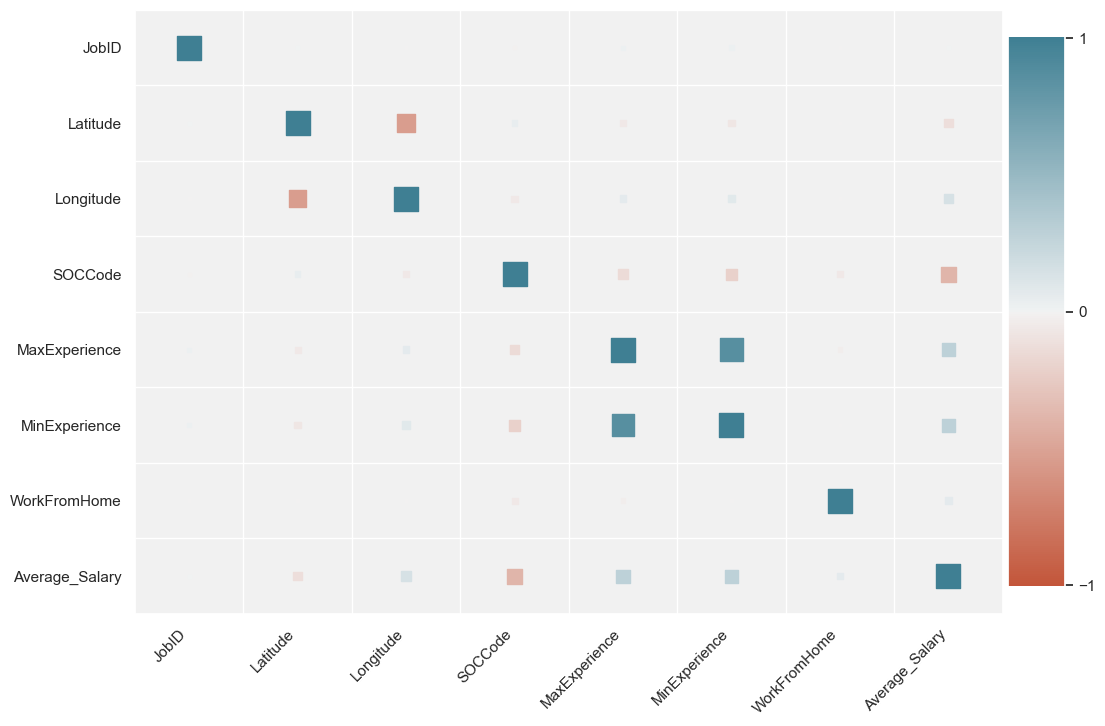

In [164]:
corrplot(data.corr(), size_scale=300);

**Correlations with salary are weak. The second best correlated variable is the experience (min and max) with a correlation coefficient of 0.29, meaning that as the experience required increases, there's a small increase in salary. The best correlated variable is the SOC code (occupation type code). There's a negative correlation with a higher code leading to lower salary. Let's do a scatter plot to obsserve:**

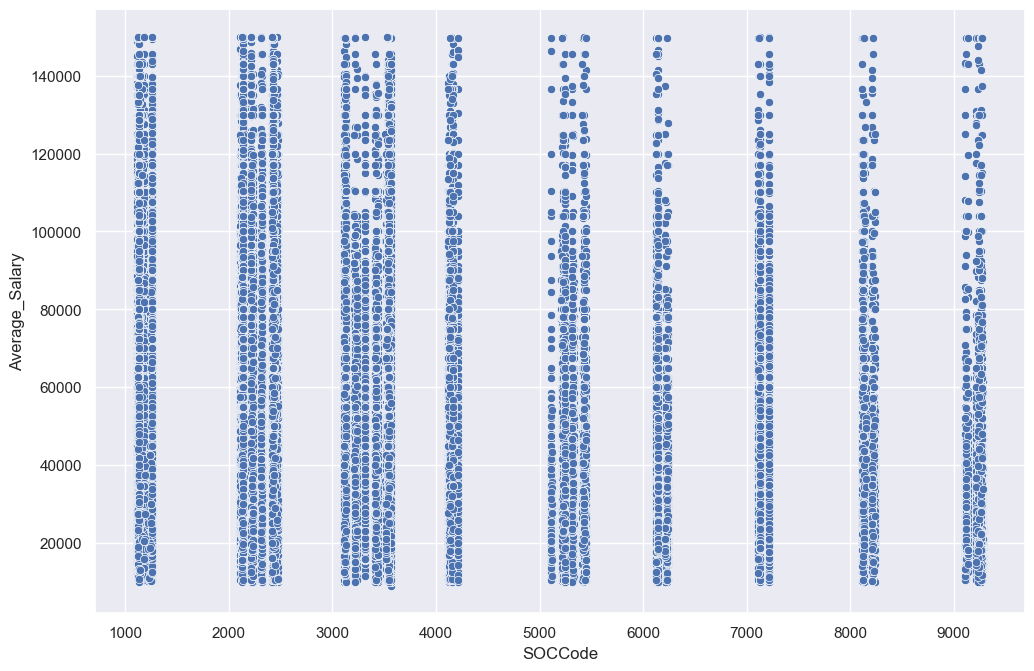

In [177]:
sns.scatterplot(x=data['SOCCode'], y=data['Average_Salary']);

**But we need to know what the SOC codes correspond to exactly. We print out the first 5 codes for every set of 'thousands' to check what type of jobs they include:**

In [196]:
soc_codes['soc'] = soc_codes['soc'].apply(str)
for i in range(1,10):
    print(soc_codes[soc_codes['soc'].str.startswith(str(i))].head(5))

    soc                                           soc_name
0  1115              Chief executives and senior officials
1  1116               Elected officers and representatives
2  1121  Production managers and directors in manufactu...
3  1122  Production managers and directors in construction
4  1123  Production managers and directors in mining an...
     soc                                         soc_name
36  2111                              Chemical scientists
37  2112            Biological scientists and biochemists
38  2113                              Physical scientists
39  2114                 Social and humanities scientists
40  2119  Natural and social science professionals n.e.c.
      soc                                    soc_name
107  3111                      Laboratory technicians
108  3112      Electrical and electronics technicians
109  3113                     Engineering technicians
110  3114  Building and civil engineering technicians
111  3115               Qual

**Looks like the first sets corresponds to officials, directors and scientists. As we go to higher codes they turn to more assistant jobs, manual labourers and machine operators. So this explains the negative correlation between SOC code and salary.**

In [275]:
data_reg = data[['MinExperience', 'Average_Salary']].dropna()

In [279]:
model = LinearRegression()
model.fit(data_reg['MinExperience'].values.reshape(-1, 1) ,data_reg['Average_Salary'])
print(model.intercept_)
# coeff_parameter = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
# coeff_parameter

32850.689087173276


In [280]:
model.coef_

array([2569.77460132])